# Regression Analysis PSKY Vs the Fama-French Market Model
Reference: kenneth french data library<br>
U.S. Research Returns Data (Downloadable Files)<br>
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html<br>
Daily Returns: July 1, 1926 - November 30, 2025<br>

## Single Factor Models with the Fama-Rrench Market Portfolio

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('F-F_Research_Data_Factors_daily.csv', skiprows=4, skipfooter=1, parse_dates=[0], index_col=0, engine='python')

In [3]:
df

,Mkt-RF,SMB,HML,RF
1926-07-01,0.09,-0.25,-0.27,0.01
1926-07-02,0.45,-0.33,-0.06,0.01
1926-07-06,0.17,0.30,-0.39,0.01
1926-07-07,0.09,-0.58,0.02,0.01
1926-07-08,0.22,-0.38,0.19,0.01
...,...,...,...,...
2025-11-21,1.03,1.66,0.74,0.02
2025-11-24,1.61,0.30,-0.96,0.02
2025-11-25,1.04,1.65,0.04,0.02
2025-11-26,0.69,-0.06,-0.07,0.02


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26129 entries, 1926-07-01 to 2025-11-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  26129 non-null  float64
 1   SMB     26129 non-null  float64
 2   HML     26129 non-null  float64
 3   RF      26129 non-null  float64
dtypes: float64(4)
memory usage: 1020.7 KB


#### Single Factor Model

In [5]:
df = df.loc["2010":"2025", ['Mkt-RF', 'RF']]

In [6]:
df

,Mkt-RF,RF
2010-01-04,1.69,0.00
2010-01-05,0.31,0.00
2010-01-06,0.13,0.00
2010-01-07,0.40,0.00
2010-01-08,0.33,0.00
...,...,...
2025-11-21,1.03,0.02
2025-11-24,1.61,0.02
2025-11-25,1.04,0.02
2025-11-26,0.69,0.02


In [7]:
psky = yf.download('PSKY', start='2010-01-01', end='2025-11-29', multi_level_index=False) #set multi_level_index to False to avoid hierarchical column index from yfinance version 0.2.48

[*********************100%***********************]  1 of 1 completed


In [8]:
psky

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,10.735097,10.848098,10.531695,10.704963,6710900
2010-01-05,10.682360,10.833028,10.584425,10.682360,5441000
2010-01-06,10.343359,10.727563,10.298159,10.554295,14566200
2010-01-07,10.546760,10.735095,10.237890,10.381025,9000300
2010-01-08,10.659760,10.885763,10.456359,10.539226,6732900
...,...,...,...,...,...
2025-11-21,15.829351,15.978779,15.400992,15.640076,5483100
2025-11-24,15.002520,15.839313,14.942748,15.829352,13558300
2025-11-25,15.580306,15.610191,15.042367,15.092176,4552500


In [9]:
psky = psky.loc[:, 'Close']

In [10]:
psky

Date
2010-01-04    10.735097
2010-01-05    10.682360
2010-01-06    10.343359
2010-01-07    10.546760
2010-01-08    10.659760
                ...    
2025-11-21    15.829351
2025-11-24    15.002520
2025-11-25    15.580306
2025-11-26    15.729733
2025-11-28    15.958856
Name: Close, Length: 4002, dtype: float64

In [11]:
psky = psky.pct_change().dropna()

In [12]:
psky

Date
2010-01-05   -0.004913
2010-01-06   -0.031735
2010-01-07    0.019665
2010-01-08    0.010714
2010-01-11   -0.004240
                ...   
2025-11-21    0.013393
2025-11-24   -0.052234
2025-11-25    0.038513
2025-11-26    0.009591
2025-11-28    0.014566
Name: Close, Length: 4001, dtype: float64

In [13]:
# adjust to percentage to match Fama-French Mkt-RF scale
psky = psky * 100

In [14]:
# merge psky returns with Fama-French factors
df['PSKY'] = psky

In [15]:
df = df.dropna()

In [16]:
df

,Mkt-RF,RF,PSKY
2010-01-05,0.31,0.00,-0.491260
2010-01-06,0.13,0.00,-3.173463
2010-01-07,0.40,0.00,1.966485
2010-01-08,0.33,0.00,1.071427
2010-01-11,0.13,0.00,-0.424019
...,...,...,...
2025-11-21,1.03,0.02,1.339283
2025-11-24,1.61,0.02,-5.223409
2025-11-25,1.04,0.02,3.851263
2025-11-26,0.69,0.02,0.959073


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2010-01-05 to 2025-11-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  4001 non-null   float64
 1   RF      4001 non-null   float64
 2   PSKY    4001 non-null   float64
dtypes: float64(3)
memory usage: 125.0 KB


In [18]:
df.describe()

,Mkt-RF,RF,PSKY
count,4001.000000,4001.000000,4001.000000
mean,0.053319,0.005381,0.046576
std,1.124072,0.007900,2.707134
min,-12.010000,0.000000,-28.352987
25%,-0.400000,0.000000,-1.215685
50%,0.080000,0.000000,0.045175
75%,0.590000,0.010000,1.226328
max,9.650000,0.020000,36.736547


In [19]:
# rename Mkt-RF to MktPrem
df = df.rename(columns={'Mkt-RF': 'MktPrem'})

In [20]:
df

,MktPrem,RF,PSKY
2010-01-05,0.31,0.00,-0.491260
2010-01-06,0.13,0.00,-3.173463
2010-01-07,0.40,0.00,1.966485
2010-01-08,0.33,0.00,1.071427
2010-01-11,0.13,0.00,-0.424019
...,...,...,...
2025-11-21,1.03,0.02,1.339283
2025-11-24,1.61,0.02,-5.223409
2025-11-25,1.04,0.02,3.851263
2025-11-26,0.69,0.02,0.959073


In [21]:
# add return of the market portfolio
df['Mkt'] = df['MktPrem'] + df['RF']

In [22]:
# add premium of PSKY over risk-free rate
df['PSKYPrem'] = df['PSKY'] - df['RF']

In [23]:
df

,MktPrem,RF,PSKY,Mkt,PSKYPrem
2010-01-05,0.31,0.00,-0.491260,0.31,-0.491260
2010-01-06,0.13,0.00,-3.173463,0.13,-3.173463
2010-01-07,0.40,0.00,1.966485,0.40,1.966485
2010-01-08,0.33,0.00,1.071427,0.33,1.071427
2010-01-11,0.13,0.00,-0.424019,0.13,-0.424019
...,...,...,...,...,...
2025-11-21,1.03,0.02,1.339283,1.05,1.319283
2025-11-24,1.61,0.02,-5.223409,1.63,-5.243409
2025-11-25,1.04,0.02,3.851263,1.06,3.831263
2025-11-26,0.69,0.02,0.959073,0.71,0.939073


In [24]:
from statsmodels.formula.api import ols

In [25]:
df

,MktPrem,RF,PSKY,Mkt,PSKYPrem
2010-01-05,0.31,0.00,-0.491260,0.31,-0.491260
2010-01-06,0.13,0.00,-3.173463,0.13,-3.173463
2010-01-07,0.40,0.00,1.966485,0.40,1.966485
2010-01-08,0.33,0.00,1.071427,0.33,1.071427
2010-01-11,0.13,0.00,-0.424019,0.13,-0.424019
...,...,...,...,...,...
2025-11-21,1.03,0.02,1.339283,1.05,1.319283
2025-11-24,1.61,0.02,-5.223409,1.63,-5.243409
2025-11-25,1.04,0.02,3.851263,1.06,3.831263
2025-11-26,0.69,0.02,0.959073,0.71,0.939073


### Market Regression Model

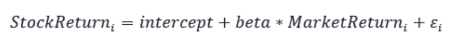

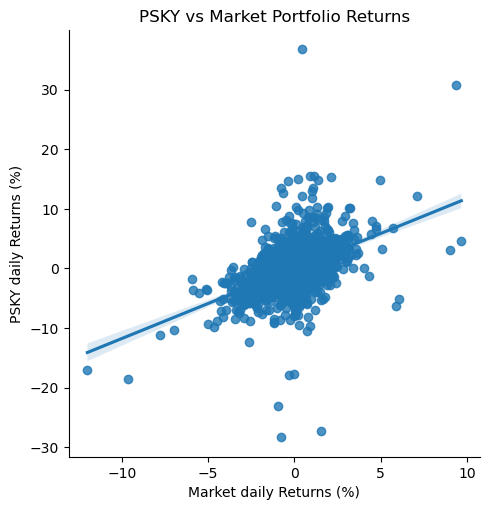

In [26]:
sns.lmplot(x='Mkt', y='PSKY', data=df)
plt.title('PSKY vs Market Portfolio Returns')
plt.xlabel('Market daily Returns (%)')
plt.ylabel('PSKY daily Returns (%)')
plt.show()

In [27]:
# build regression model
model = ols('PSKY ~ Mkt', data=df)

In [28]:
results = model.fit()

In [29]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   PSKY   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1249.
Date:                Thu, 01 Jan 2026   Prob (F-statistic):          2.17e-238
Time:                        16:36:57   Log-Likelihood:                -9117.4
No. Observations:                4001   AIC:                         1.824e+04
Df Residuals:                    3999   BIC:                         1.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0224      0.037     -0.599      0.5

### CAPM Regression Model
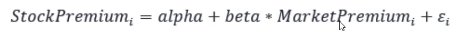

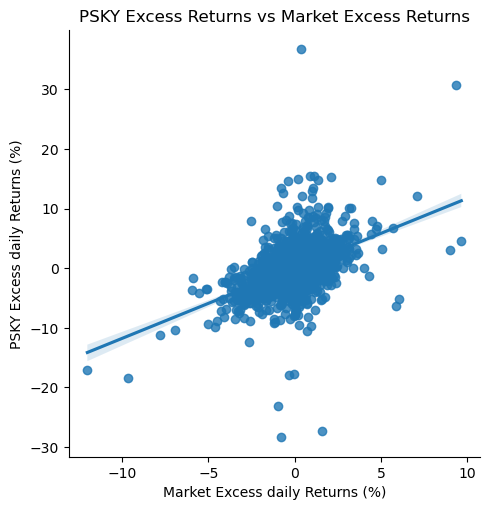

In [30]:
sns.lmplot(x='MktPrem', y='PSKYPrem', data=df)
plt.title('PSKY Excess Returns vs Market Excess Returns')
plt.xlabel('Market Excess daily Returns (%)')
plt.ylabel('PSKY Excess daily Returns (%)')
plt.show()

In [31]:
model2 = ols('PSKYPrem ~ MktPrem', data=df)

In [32]:
results2 = model2.fit()

In [33]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               PSKYPrem   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1250.
Date:                Thu, 01 Jan 2026   Prob (F-statistic):          1.61e-238
Time:                        16:36:57   Log-Likelihood:                -9117.3
No. Observations:                4001   AIC:                         1.824e+04
Df Residuals:                    3999   BIC:                         1.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0215      0.037     -0.574      0.5

In [34]:
# annualized alpha from the excess returns regression
(results2.params.Intercept / 100 + 1) ** 252 - 1

np.float64(-0.052683473185967555)

Conclude that PSKY stocks underperformend the markety by - 5.26% on an annual basis

## Fama-French Three-Factor Model
Two additional factors added to the CAPM model - "Small minus Big" and "High minus Low"<br>
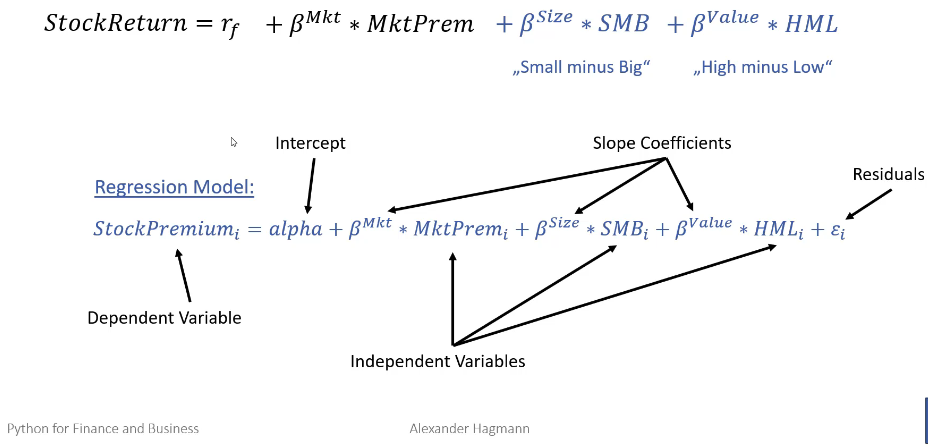

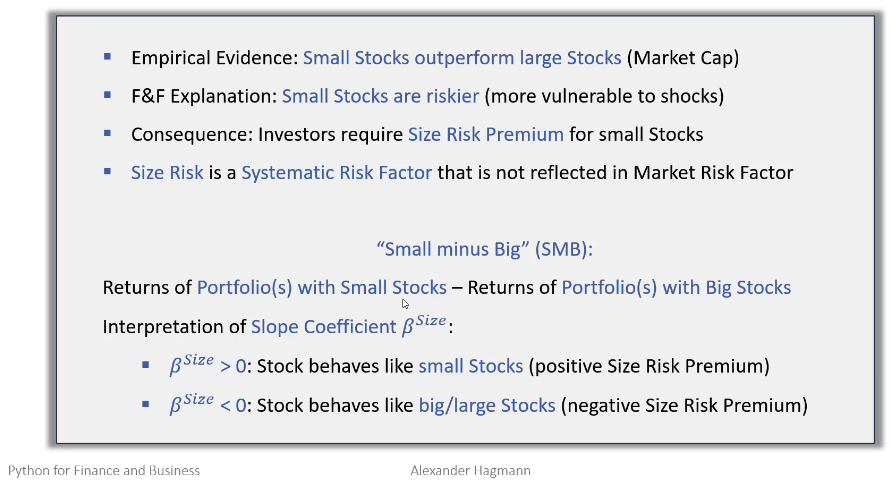<br>
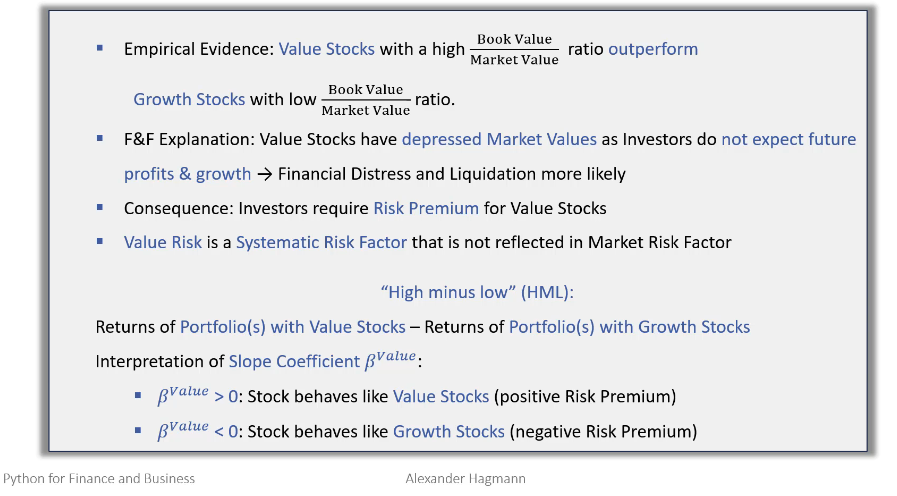<br>

In [35]:
df = pd.read_csv('F-F_Research_Data_Factors_daily.csv', skiprows=4, skipfooter=1, parse_dates=[0], index_col=0, engine='python')

In [36]:
df

,Mkt-RF,SMB,HML,RF
1926-07-01,0.09,-0.25,-0.27,0.01
1926-07-02,0.45,-0.33,-0.06,0.01
1926-07-06,0.17,0.30,-0.39,0.01
1926-07-07,0.09,-0.58,0.02,0.01
1926-07-08,0.22,-0.38,0.19,0.01
...,...,...,...,...
2025-11-21,1.03,1.66,0.74,0.02
2025-11-24,1.61,0.30,-0.96,0.02
2025-11-25,1.04,1.65,0.04,0.02
2025-11-26,0.69,-0.06,-0.07,0.02


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26129 entries, 1926-07-01 to 2025-11-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  26129 non-null  float64
 1   SMB     26129 non-null  float64
 2   HML     26129 non-null  float64
 3   RF      26129 non-null  float64
dtypes: float64(4)
memory usage: 1020.7 KB


In [38]:
psky = yf.download('PSKY', start='2010-01-01', end='2025-11-29', multi_level_index=False) #set multi_level_index to False to avoid hierarchical column index from yfinance version 0.2.48

[*********************100%***********************]  1 of 1 completed


In [39]:
psky = psky.loc[:, "Close"]

In [40]:
psky

Date
2010-01-04    10.735097
2010-01-05    10.682360
2010-01-06    10.343359
2010-01-07    10.546760
2010-01-08    10.659760
                ...    
2025-11-21    15.829351
2025-11-24    15.002520
2025-11-25    15.580306
2025-11-26    15.729733
2025-11-28    15.958856
Name: Close, Length: 4002, dtype: float64

In [41]:
psky = psky.pct_change().dropna()
psky

Date
2010-01-05   -0.004913
2010-01-06   -0.031735
2010-01-07    0.019665
2010-01-08    0.010714
2010-01-11   -0.004240
                ...   
2025-11-21    0.013393
2025-11-24   -0.052234
2025-11-25    0.038513
2025-11-26    0.009591
2025-11-28    0.014566
Name: Close, Length: 4001, dtype: float64

In [42]:
psky = psky * 100

In [43]:
df["PSKY"] = psky

In [44]:
df = df.dropna()

In [45]:
df

,Mkt-RF,SMB,HML,RF,PSKY
2010-01-05,0.31,-0.64,1.22,0.00,-0.491260
2010-01-06,0.13,-0.23,0.55,0.00,-3.173463
2010-01-07,0.40,0.09,0.96,0.00,1.966485
2010-01-08,0.33,0.36,0.02,0.00,1.071427
2010-01-11,0.13,-0.13,-0.26,0.00,-0.424019
...,...,...,...,...,...
2025-11-21,1.03,1.66,0.74,0.02,1.339283
2025-11-24,1.61,0.30,-0.96,0.02,-5.223409
2025-11-25,1.04,1.65,0.04,0.02,3.851263
2025-11-26,0.69,-0.06,-0.07,0.02,0.959073


In [46]:
df = df.rename(columns={'Mkt-RF': 'MktPrem'})
df

,MktPrem,SMB,HML,RF,PSKY
2010-01-05,0.31,-0.64,1.22,0.00,-0.491260
2010-01-06,0.13,-0.23,0.55,0.00,-3.173463
2010-01-07,0.40,0.09,0.96,0.00,1.966485
2010-01-08,0.33,0.36,0.02,0.00,1.071427
2010-01-11,0.13,-0.13,-0.26,0.00,-0.424019
...,...,...,...,...,...
2025-11-21,1.03,1.66,0.74,0.02,1.339283
2025-11-24,1.61,0.30,-0.96,0.02,-5.223409
2025-11-25,1.04,1.65,0.04,0.02,3.851263
2025-11-26,0.69,-0.06,-0.07,0.02,0.959073


In [47]:
df["PSKYPrem"] = df["PSKY"] - df["RF"]

In [48]:
df

,MktPrem,SMB,HML,RF,PSKY,PSKYPrem
2010-01-05,0.31,-0.64,1.22,0.00,-0.491260,-0.491260
2010-01-06,0.13,-0.23,0.55,0.00,-3.173463,-3.173463
2010-01-07,0.40,0.09,0.96,0.00,1.966485,1.966485
2010-01-08,0.33,0.36,0.02,0.00,1.071427,1.071427
2010-01-11,0.13,-0.13,-0.26,0.00,-0.424019,-0.424019
...,...,...,...,...,...,...
2025-11-21,1.03,1.66,0.74,0.02,1.339283,1.319283
2025-11-24,1.61,0.30,-0.96,0.02,-5.223409,-5.243409
2025-11-25,1.04,1.65,0.04,0.02,3.851263,3.831263
2025-11-26,0.69,-0.06,-0.07,0.02,0.959073,0.939073


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2010-01-05 to 2025-11-28
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MktPrem   4001 non-null   float64
 1   SMB       4001 non-null   float64
 2   HML       4001 non-null   float64
 3   RF        4001 non-null   float64
 4   PSKY      4001 non-null   float64
 5   PSKYPrem  4001 non-null   float64
dtypes: float64(6)
memory usage: 218.8 KB


In [50]:
df.corr()

,MktPrem,SMB,HML,RF,PSKY,PSKYPrem
MktPrem,1.000000,0.281505,-0.014413,-0.006556,0.488020,0.488009
SMB,0.281505,1.000000,-0.004143,-0.022694,0.274574,0.274623
HML,-0.014413,-0.004143,1.000000,-0.020319,0.163272,0.163321
RF,-0.006556,-0.022694,-0.020319,1.000000,-0.019595,-0.022512
PSKY,0.488020,0.274574,0.163272,-0.019595,1.000000,0.999996
PSKYPrem,0.488009,0.274623,0.163321,-0.022512,0.999996,1.000000


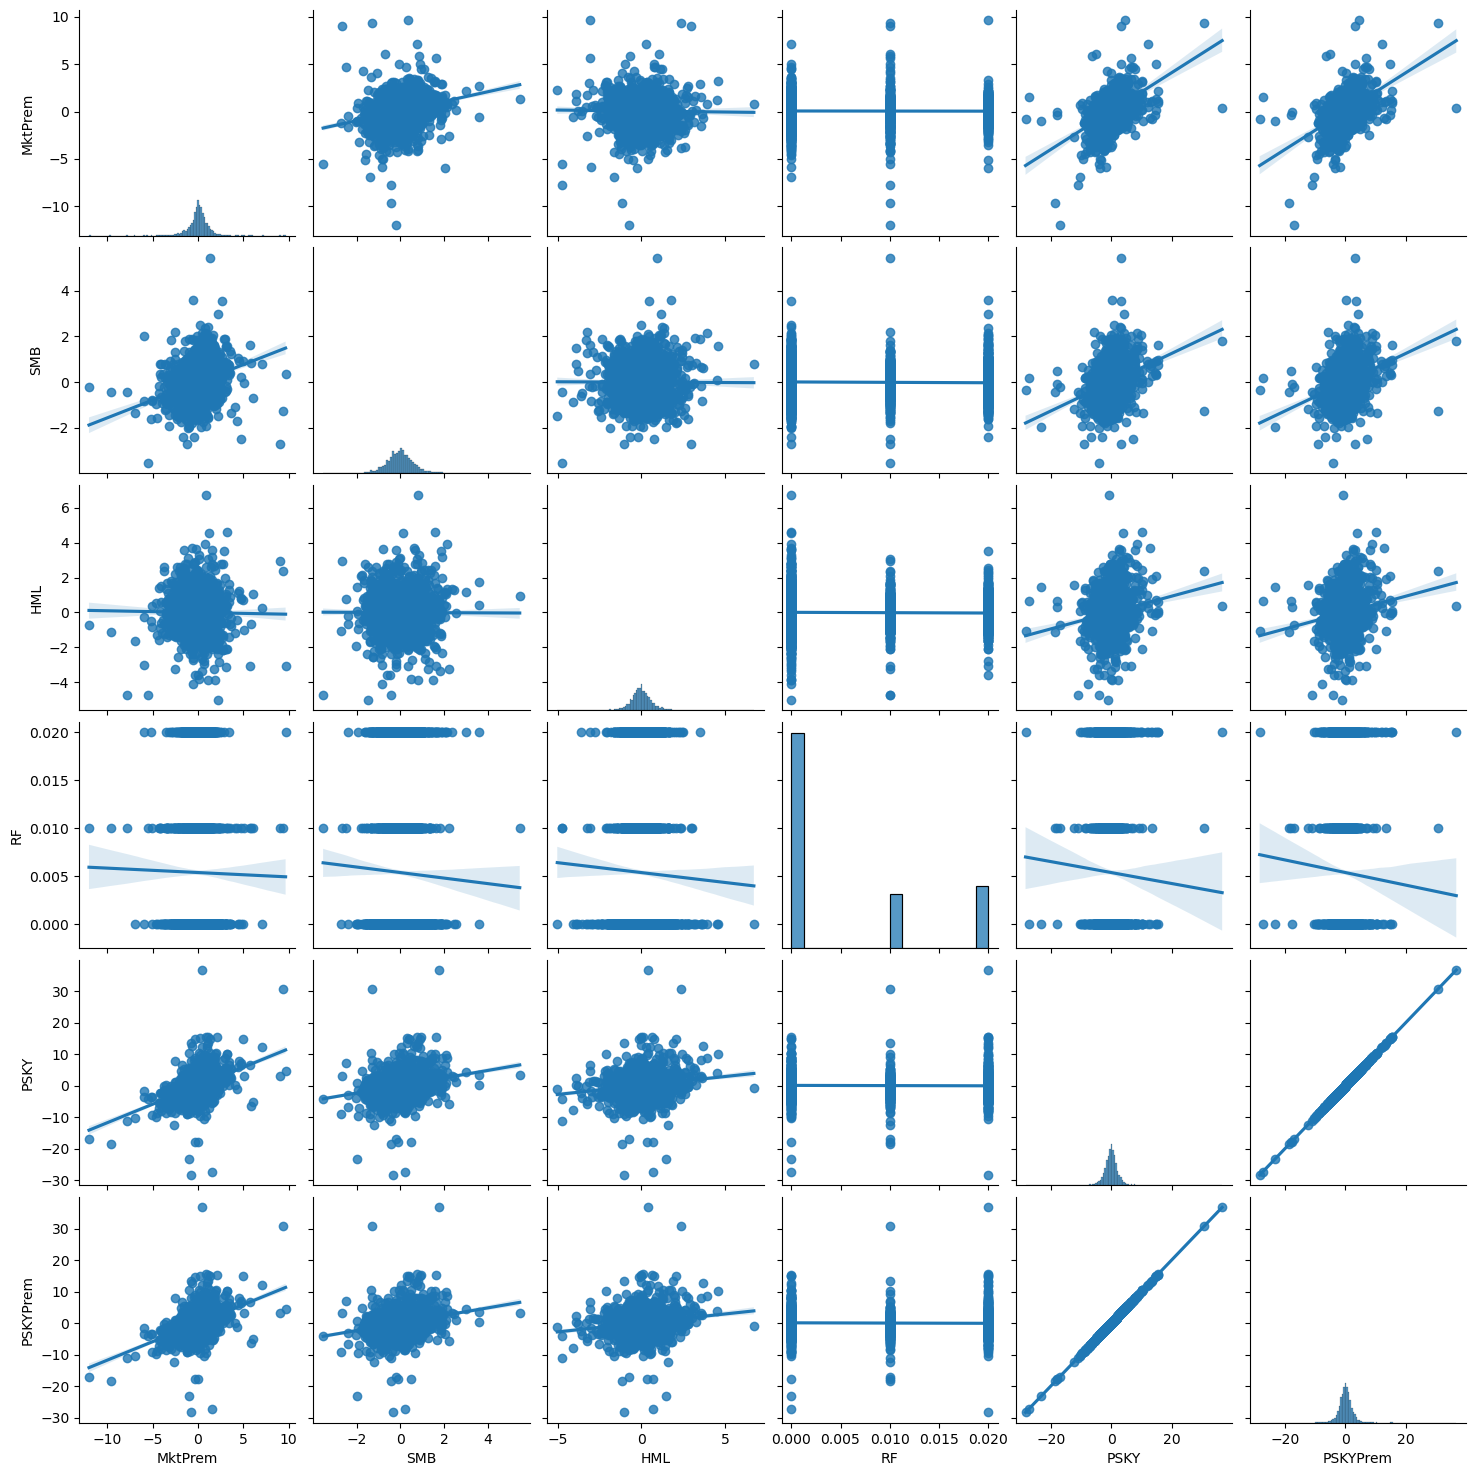

In [51]:
sns.pairplot(df, kind='reg')
plt.show()

In [52]:
# multi regression model for 3 factors
model = ols('PSKYPrem ~ MktPrem + SMB + HML', data=df)

In [53]:
results = model.fit()

In [54]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               PSKYPrem   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     538.0
Date:                Thu, 01 Jan 2026   Prob (F-statistic):          1.12e-293
Time:                        16:37:10   Log-Likelihood:                -8983.0
No. Observations:                4001   AIC:                         1.797e+04
Df Residuals:                    3997   BIC:                         1.800e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0106      0.036     -0.292      0.7

In [55]:
# annualized alpha from the multi-factor regression
(results.params.Intercept / 100 + 1) ** 252 - 1

np.float64(-0.02624717904658136)

## Fama-French Five-Factor Model
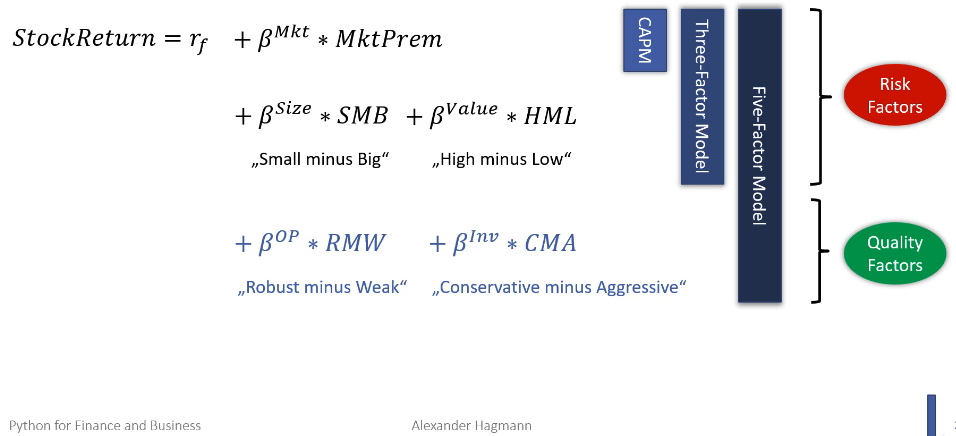

In [56]:
df = pd.read_csv('F-F_Research_Data_5_Factors_2x3_daily.csv', skiprows=4, skipfooter=1, parse_dates=[0], index_col=0, engine='python')

In [57]:
df

,Mkt-RF,SMB,HML,RMW,CMA,RF
1963-07-01,-0.67,0.00,-0.34,-0.01,0.16,0.01
1963-07-02,0.79,-0.26,0.26,-0.07,-0.20,0.01
1963-07-03,0.63,-0.17,-0.09,0.18,-0.34,0.01
1963-07-05,0.40,0.08,-0.27,0.09,-0.34,0.01
1963-07-08,-0.63,0.04,-0.18,-0.29,0.14,0.01
...,...,...,...,...,...,...
2025-11-21,1.03,1.85,0.74,0.09,0.95,0.02
2025-11-24,1.61,0.05,-0.96,-1.08,-1.57,0.02
2025-11-25,1.04,1.58,0.04,-0.09,0.36,0.02
2025-11-26,0.69,-0.01,-0.07,-0.35,-0.06,0.02


In [58]:
df = df.rename(columns={'Mkt-RF': 'MktPrem'})
df

,MktPrem,SMB,HML,RMW,CMA,RF
1963-07-01,-0.67,0.00,-0.34,-0.01,0.16,0.01
1963-07-02,0.79,-0.26,0.26,-0.07,-0.20,0.01
1963-07-03,0.63,-0.17,-0.09,0.18,-0.34,0.01
1963-07-05,0.40,0.08,-0.27,0.09,-0.34,0.01
1963-07-08,-0.63,0.04,-0.18,-0.29,0.14,0.01
...,...,...,...,...,...,...
2025-11-21,1.03,1.85,0.74,0.09,0.95,0.02
2025-11-24,1.61,0.05,-0.96,-1.08,-1.57,0.02
2025-11-25,1.04,1.58,0.04,-0.09,0.36,0.02
2025-11-26,0.69,-0.01,-0.07,-0.35,-0.06,0.02


In [59]:
psky = yf.download('PSKY', start='2010-01-01', end='2025-12-31', multi_level_index=False) #set multi_level_index to False to avoid hierarchical column index from yfinance version 0.2.48]

[*********************100%***********************]  1 of 1 completed


In [60]:
psky

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,10.735093,10.848094,10.531691,10.704960,6710900
2010-01-05,10.682361,10.833028,10.584426,10.682361,5441000
2010-01-06,10.343357,10.727561,10.298157,10.554293,14566200
2010-01-07,10.546758,10.735093,10.237888,10.381023,9000300
2010-01-08,10.659760,10.885762,10.456358,10.539225,6732900
...,...,...,...,...,...
2025-12-23,13.530000,13.640000,13.440000,13.490000,4407500
2025-12-24,13.740000,13.750000,13.360000,13.490000,2464100
2025-12-26,13.590000,13.740000,13.460000,13.700000,2886800


In [61]:
psky = psky.loc[:, "Close"]


In [62]:
psky = psky.pct_change().dropna()

In [63]:
psky

Date
2010-01-05   -0.004912
2010-01-06   -0.031735
2010-01-07    0.019665
2010-01-08    0.010714
2010-01-11   -0.004240
                ...   
2025-12-23   -0.005878
2025-12-24    0.015521
2025-12-26   -0.010917
2025-12-29   -0.006623
2025-12-30    0.000741
Name: Close, Length: 4022, dtype: float64

In [64]:
psky = psky * 100
psky

Date
2010-01-05   -0.491216
2010-01-06   -3.173489
2010-01-07    1.966485
2010-01-08    1.071437
2010-01-11   -0.423992
                ...   
2025-12-23   -0.587803
2025-12-24    1.552107
2025-12-26   -1.091700
2025-12-29   -0.662253
2025-12-30    0.074076
Name: Close, Length: 4022, dtype: float64

In [65]:
df["PSKY"] = psky

In [66]:
df = df.dropna().copy()

In [67]:
df

,MktPrem,SMB,HML,RMW,CMA,RF,PSKY
2010-01-05,0.31,-0.42,1.22,-0.18,0.18,0.00,-0.491216
2010-01-06,0.13,-0.14,0.55,-0.05,0.20,0.00,-3.173489
2010-01-07,0.40,0.25,0.96,-0.66,0.22,0.00,1.966485
2010-01-08,0.33,0.31,0.02,0.23,-0.40,0.00,1.071437
2010-01-11,0.13,-0.14,-0.26,0.18,0.58,0.00,-0.423992
...,...,...,...,...,...,...,...
2025-11-21,1.03,1.85,0.74,0.09,0.95,0.02,1.339283
2025-11-24,1.61,0.05,-0.96,-1.08,-1.57,0.02,-5.223409
2025-11-25,1.04,1.58,0.04,-0.09,0.36,0.02,3.851263
2025-11-26,0.69,-0.01,-0.07,-0.35,-0.06,0.02,0.959073


In [68]:
df["PSKYPrem"] = df["PSKY"] - df["RF"]
df

,MktPrem,SMB,HML,RMW,CMA,RF,PSKY,PSKYPrem
2010-01-05,0.31,-0.42,1.22,-0.18,0.18,0.00,-0.491216,-0.491216
2010-01-06,0.13,-0.14,0.55,-0.05,0.20,0.00,-3.173489,-3.173489
2010-01-07,0.40,0.25,0.96,-0.66,0.22,0.00,1.966485,1.966485
2010-01-08,0.33,0.31,0.02,0.23,-0.40,0.00,1.071437,1.071437
2010-01-11,0.13,-0.14,-0.26,0.18,0.58,0.00,-0.423992,-0.423992
...,...,...,...,...,...,...,...,...
2025-11-21,1.03,1.85,0.74,0.09,0.95,0.02,1.339283,1.319283
2025-11-24,1.61,0.05,-0.96,-1.08,-1.57,0.02,-5.223409,-5.243409
2025-11-25,1.04,1.58,0.04,-0.09,0.36,0.02,3.851263,3.831263
2025-11-26,0.69,-0.01,-0.07,-0.35,-0.06,0.02,0.959073,0.939073


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2010-01-05 to 2025-11-28
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MktPrem   4001 non-null   float64
 1   SMB       4001 non-null   float64
 2   HML       4001 non-null   float64
 3   RMW       4001 non-null   float64
 4   CMA       4001 non-null   float64
 5   RF        4001 non-null   float64
 6   PSKY      4001 non-null   float64
 7   PSKYPrem  4001 non-null   float64
dtypes: float64(8)
memory usage: 281.3 KB


In [71]:
df.corr()

,MktPrem,SMB,HML,RMW,CMA,RF,PSKY,PSKYPrem
MktPrem,1.000000,0.260268,-0.014413,-0.298535,-0.197690,-0.006556,0.488020,0.488009
SMB,0.260268,1.000000,0.241447,-0.310386,0.027621,-0.027475,0.311068,0.311129
HML,-0.014413,0.241447,1.000000,0.219270,0.553124,-0.020319,0.163272,0.163321
RMW,-0.298535,-0.310386,0.219270,1.000000,0.214944,-0.017359,-0.175590,-0.175528
CMA,-0.197690,0.027621,0.553124,0.214944,1.000000,-0.035473,-0.002378,-0.002275
RF,-0.006556,-0.027475,-0.020319,-0.017359,-0.035473,1.000000,-0.019595,-0.022512
PSKY,0.488020,0.311068,0.163272,-0.175590,-0.002378,-0.019595,1.000000,0.999996
PSKYPrem,0.488009,0.311129,0.163321,-0.175528,-0.002275,-0.022512,0.999996,1.000000


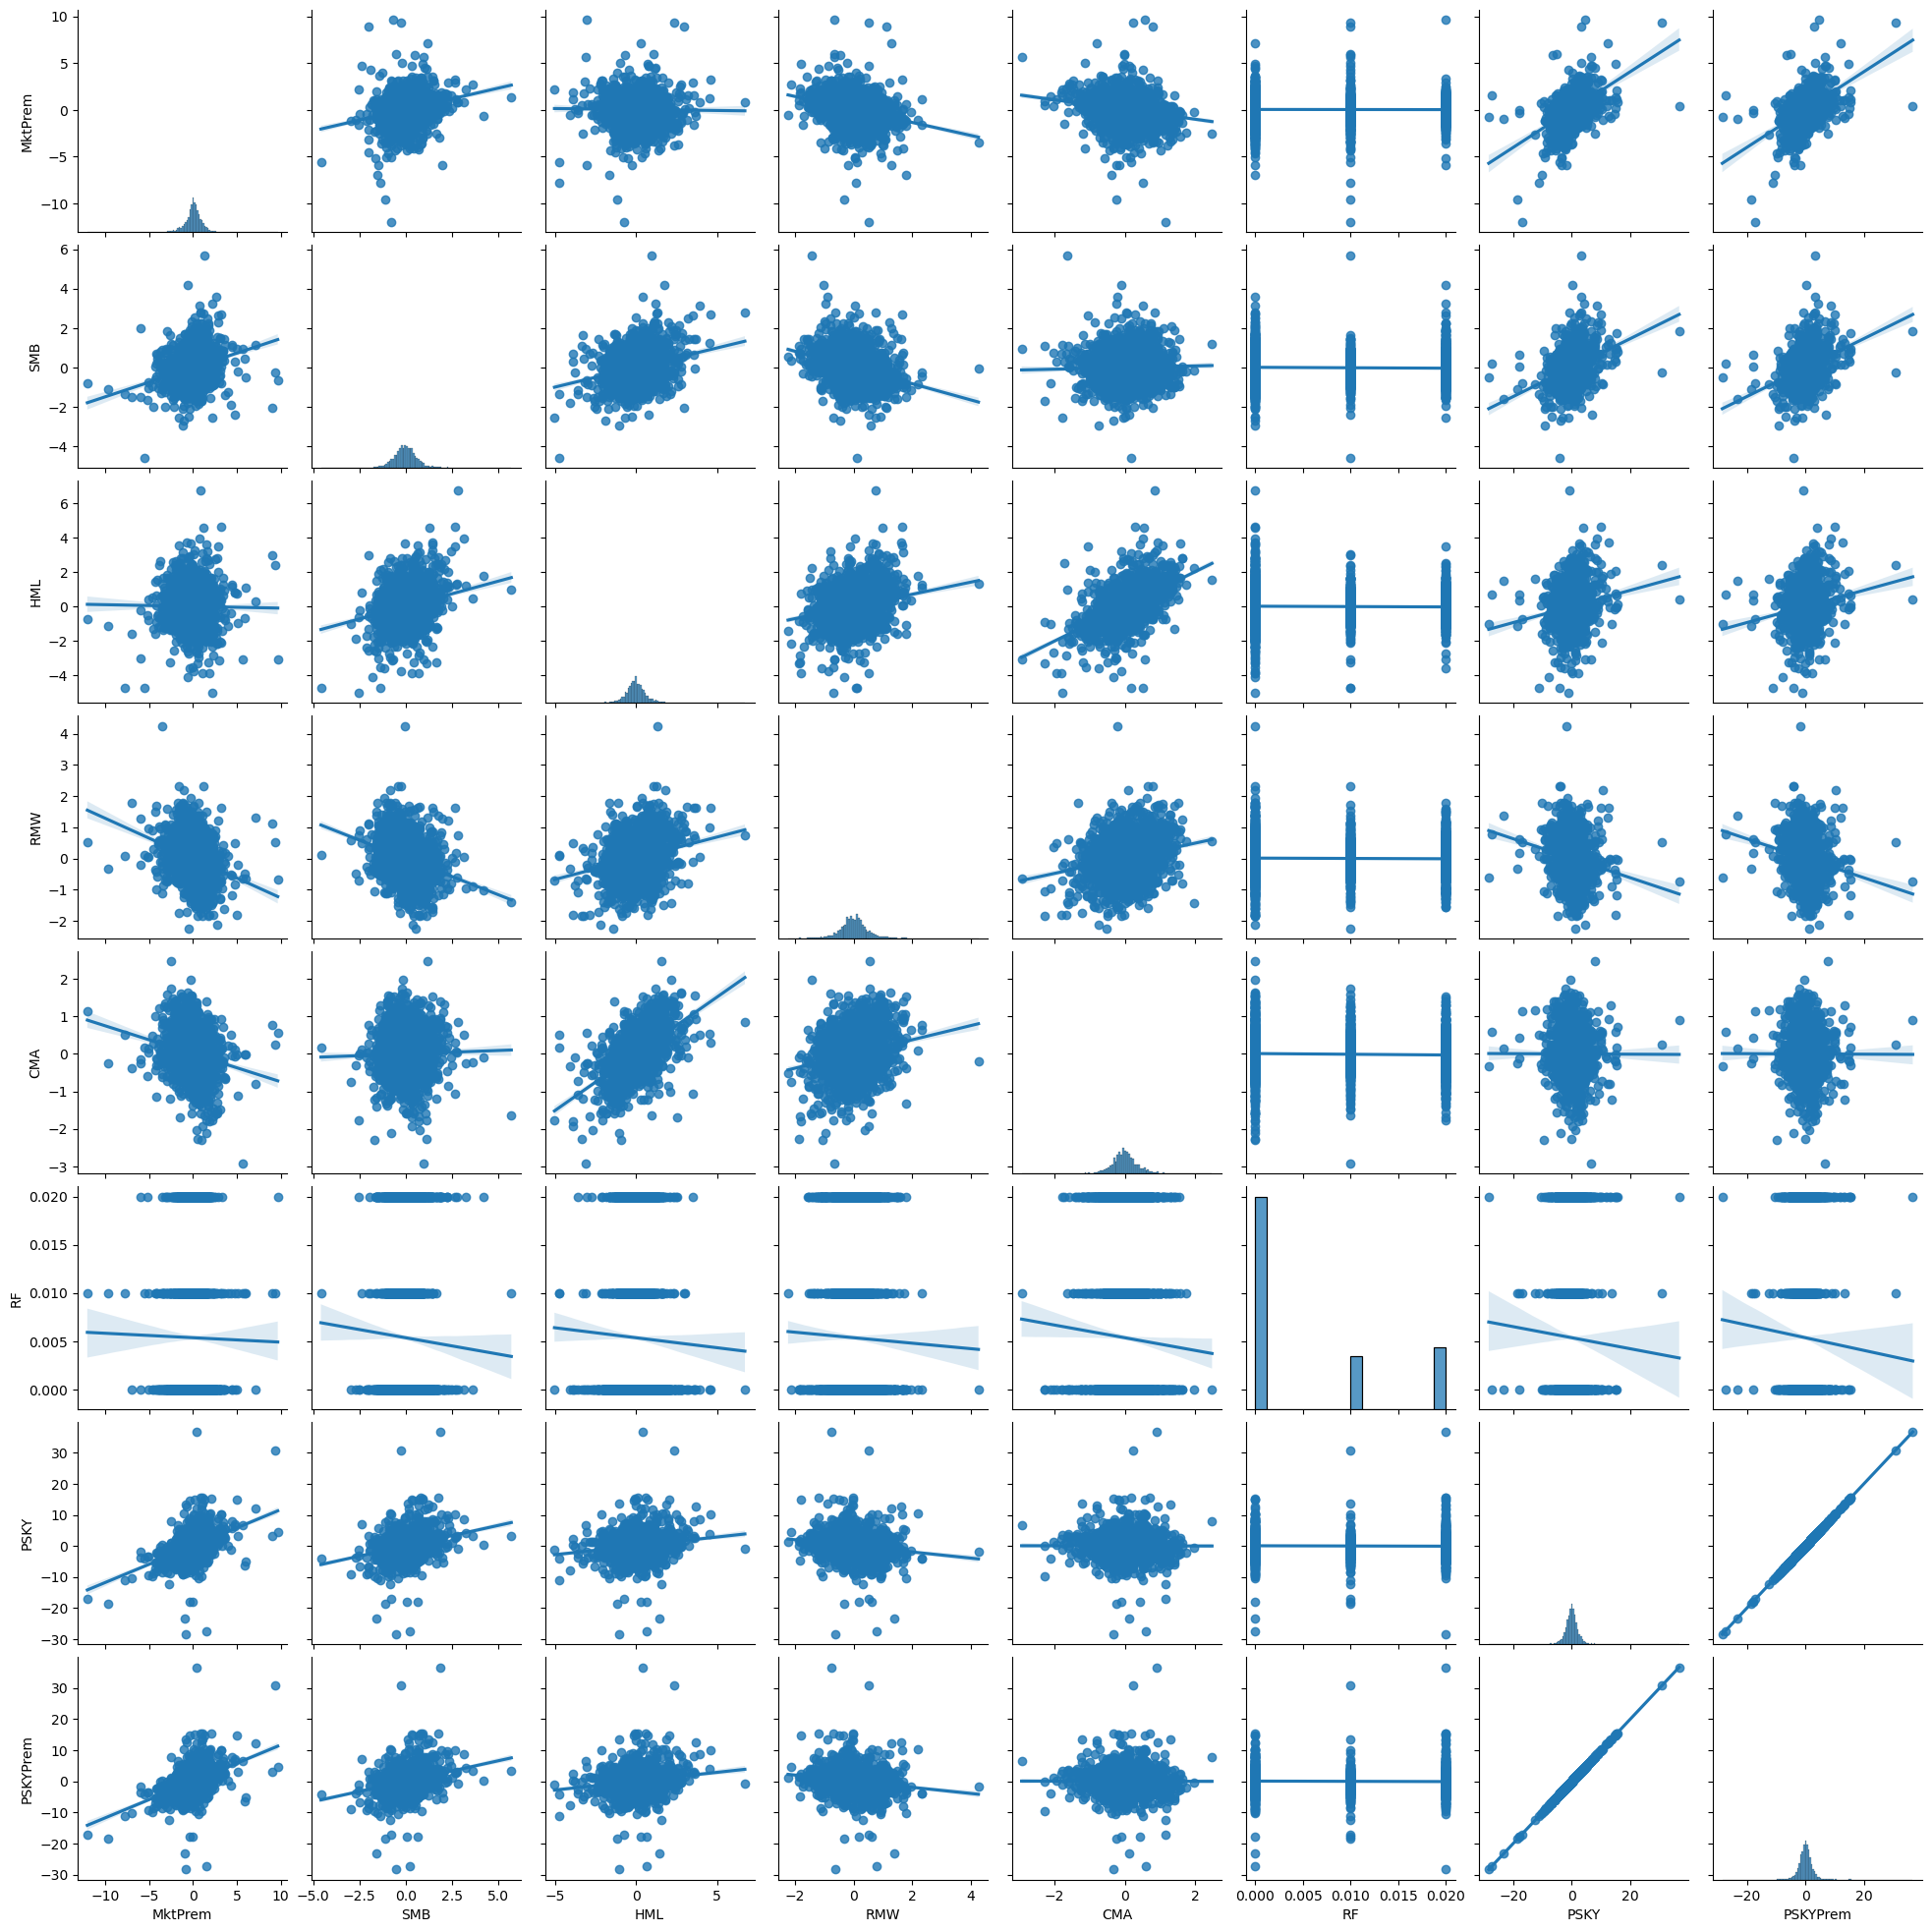

In [72]:
sns.pairplot(df, kind='reg')
plt.show()

In [73]:
model = ols('PSKYPrem ~ MktPrem + SMB + HML + RMW + CMA', data=df)

In [74]:
results = model.fit()

In [75]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               PSKYPrem   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     328.1
Date:                Thu, 01 Jan 2026   Prob (F-statistic):          3.94e-295
Time:                        16:41:27   Log-Likelihood:                -8973.3
No. Observations:                4001   AIC:                         1.796e+04
Df Residuals:                    3995   BIC:                         1.800e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0087      0.036     -0.242      0.8

In [76]:
# annualized alpha from the 5-factor regression
(results.params.Intercept / 100 + 1) ** 252 - 1

np.float64(-0.02179549069989284)